## Spectra Generator Exploration

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
np.random.seed(0)

%matplotlib inline

- Up to 10 peaks. --> variation of peak numbers. In the beginning, up to 5 peaks.
- scae - number that describes length of mode. This is later scaled by the number of resonances. 
- vary width between the peaks. 
- phases and channels determined by channels and are kind of random. 
- As we increase the number of channnels, we increase the possibility of superimposing modes. 
- Even if we have the same frequency, if diff. width, can still distingish. 
- to make it harder, increase scale, decrease the variation. 
- mass gage in cases of 1% tank volume. 

#### Deliverable
- mode counting must be automated. 
- input will be acoustic spectrum and the output should be 
- peak with high accuracy.
- at a later stage, how to take the spectrum and represent it as a union of local problems. 
- crucial: count modes in somem standard window

### Differences to real data
- shell modes are wider than real modes. 

- raw data will have gaussian noise added + shell modes. 
- the density of shell modes are more or less constant -> they are broader
- **problem** - distinguish shell modes from liquid modes. 

### Global problem
- physics of dissipation are different translates to different width of modes.
- excites differently. 
- delay to preprocess shell modes. 

In [3]:
np.random.seed(2)
max_resonances = 5
N = int(np.floor(np.random.rand()*max_resonances) + 1)
num_channels = 10
num_columns = 3
scale = 1 # should be unit
omega_shift = 10
variation = 1.8 # somewhere around 0.50. 

omega = np.random.rand(N) + 10
gamma = (scale/max_resonances)*(1 + variation*(np.random.rand(N) - 0.5))/4
# if gamma is smaller, easier task. 

#phase = np.zeros(N, int)
#amp = np.zeros(N, int)
phase_0 = 2 * math.pi * np.random.rand(num_channels*num_columns, N)
amp_0 = np.random.rand(num_channels*num_columns, N)

n = 1000*omega_shift
omega_i = 0
omega_f = 2 * omega_shift + 1
omega = np.arange(omega_i, omega_f, (omega_f - omega_i)/(n - 1))

In [4]:
for jj in range(num_channels):
    range_list = np.arange(np.floor(n*(0.5 - 0.5/omega_shift)), np.floor(n*(0.5 + 0.5/omega_shift))).astype(int)
    L = np.zeros(n-1)
    phase = phase_0[jj, :]
    amp = amp_0[jj,:]

    for i in range(N):
        L = L + amp[i]/2 * (np.exp(1j*phase[i]) / (omega[i] + omega+ 1j + gamma[i]) + np.exp(-1j*phase[i])/(omega - omega[i] + 1j*gamma[i]))
    c_F = np.abs(L)
    d = c_F**2
    d = (d - min(d[range_list])) / (max(d[range_list])) - min(d[range_list])
    dm = d[range_list]

In [5]:
def generate_random_data(num):
    sound_waves = []
    for i in range(num):
        max_resonances = 5
        N = int(np.floor(np.random.rand()*max_resonances) + 1)
        num_channels = 10
        num_columns = 3
        scale = 1 # should be unit
        omega_shift = 10
        variation = 1.8 # somewhere around 0.50. 

        omega = np.random.rand(N) + 10
        gamma = (scale/max_resonances)*(1 + variation*(np.random.rand(N) - 0.5))/4
        # if gamma is smaller, easier task. 

        #phase = np.zeros(N, int)
        #amp = np.zeros(N, int)
        phase_0 = 2 * math.pi * np.random.rand(num_channels*num_columns, N)
        amp_0 = np.random.rand(num_channels*num_columns, N)

        n = 1000*omega_shift
        omega_i = 0
        omega_f = 2 * omega_shift + 1
        omega = np.arange(omega_i, omega_f, (omega_f - omega_i)/(n - 1))
        
        for jj in range(num_channels):
            range_list = np.arange(np.floor(n*(0.5 - 0.5/omega_shift)), np.floor(n*(0.5 + 0.5/omega_shift))).astype(int)
            L = np.zeros(n-1)
            phase = phase_0[jj, :]
            amp = amp_0[jj,:]

            for i in range(N):
                L = L + amp[i]/2 * (np.exp(1j*phase[i]) / (omega[i] + omega+ 1j + gamma[i]) + np.exp(-1j*phase[i])/(omega - omega[i] + 1j*gamma[i]))
            
            c_F = np.abs(L)
            d = c_F**2
            d = (d - min(d[range_list])) / (max(d[range_list])) - min(d[range_list])
            dm = d[range_list]
        sound_waves.append((N, dm))
    return sound_waves

In [8]:
random = generate_random_data(100)

In [9]:
random

[(4, array([ 3.12102373e-01,  3.11673746e-01,  3.11245394e-01,  3.10817317e-01,
          3.10389514e-01,  3.09961984e-01,  3.09534729e-01,  3.09107747e-01,
          3.08681038e-01,  3.08254602e-01,  3.07828439e-01,  3.07402549e-01,
          3.06976931e-01,  3.06551585e-01,  3.06126511e-01,  3.05701708e-01,
          3.05277177e-01,  3.04852917e-01,  3.04428928e-01,  3.04005210e-01,
          3.03581762e-01,  3.03158585e-01,  3.02735677e-01,  3.02313040e-01,
          3.01890671e-01,  3.01468573e-01,  3.01046743e-01,  3.00625182e-01,
          3.00203890e-01,  2.99782867e-01,  2.99362111e-01,  2.98941624e-01,
          2.98521404e-01,  2.98101452e-01,  2.97681767e-01,  2.97262349e-01,
          2.96843198e-01,  2.96424314e-01,  2.96005696e-01,  2.95587344e-01,
          2.95169258e-01,  2.94751438e-01,  2.94333883e-01,  2.93916594e-01,
          2.93499570e-01,  2.93082810e-01,  2.92666315e-01,  2.92250085e-01,
          2.91834118e-01,  2.91418416e-01,  2.91002977e-01,  2.90587802e-

## Model Research
https://towardsdatascience.com/getting-started-on-deep-learning-for-audio-data-667d9aa76a33

### GRU
1. Add BatchNorm layer to standardize the input numbers (The audio inputs have not standardized yet)
2. Add the Bidirectional GRU to process the input
3. Flatten the result
4. Create final dense layer.  

## Notes
- Slide with roadmap diagram. Goes into next quarter. More detailed/low-level plan for the next two weeks. 

In [1]:
import matlab.engine

In [3]:
%cd ../matlab

/Users/mateoibarguen/Desktop/DATA-Capstone/spectra_generator/matlab


In [56]:
ENGINE = matlab.engine.start_matlab()

In [123]:
import matplotlib.pyplot as plt
import json

In [312]:
class Spectrum:
    def __init__(self, n, dm, peak_locations, num_channels, **kwargs):
        self.n = n
        self.dm = dm
        self.peak_locations = peak_locations
        self.num_channels = num_channels
        
    def plot_channel(self, channel_number):
        sns.lineplot(x=np.linspace(0, 1, d.shape[0]), y=self.dm[channel_number])
        for peak in self.peak_locations[0]:
            plt.axvline(peak, 0, 1, c='red', alpha=0.6)

    def plot_channels(self):
        n_rows = (self.num_channels + 0.5) // 2
        fig = plt.figure(figsize=(30, 35))
        for channel in range(int(self.num_channels)):
            plt.subplot(n_rows, 2, channel + 1)
            self.plot_channel(channel)
        plt.show()

In [324]:
class SpectraGenerator:
    def __init__(self, n_max=5.0, nc=10.0, k=1, scale=1.0, omega_shift=10.0):
        self.n_max = n_max
        self.n_max_s = 5.0
        self.nc = nc
        self.k = k
        self.num_channels = self.nc*self.k
        self.scale = scale
        self.omega_shift = omega_shift
        
    def generate_spectrum(self):
        n, dm, peak_locations = ENGINE.spectra_generator_simple(self.n_max, self.n_max_s, self.nc, self.k, self.scale, self.omega_shift, nargout=3)
        dm_array, peak_array = np.array(dm), np.array(peak_locations)
        del dm, peak_locations
        spectrum = Spectrum(n=n, dm=dm_array, peak_locations=peak_array, **self.__dict__)
        return spectrum
    
    def generate_spectra(self, n_instances):
        return [self.generate_spectrum() for i in range(n_instances)]
    
    def generate_spectra_json(self, n_instances):
        spectra = self.generate_spectra(n_instances)
        spectra_json = [spectrum.__dict__ for spectrum in spectra]
        return spectra_json
    
    @staticmethod
    def save_spectra(self, spectra_json, filename):
        with open(filename, 'w') as file_out:
            json.dump(spectra_json, filename)
            
    def generate_save_spectra(self, n_instances, filename):
        spectra_json = self.generate_spectra_json(n_instances, filename)
        self.save_spectra(spectra_json, filename)

In [325]:
spectra_generator = SpectraGenerator()

In [326]:
spectrum = spectra_generator.generate_spectrum()

In [328]:
s = spectra_generator.generate_spectra_json(100)

In [332]:
pd.DataFrame(s)['dm']

0     [[0.009746334568964968, 0.0020396799713457555,...
1     [[0.021957206914635864, 0.023728348111542716, ...
2     [[0.007577483335564845, 0.01160675798432823, 0...
3     [[0.0026131147228176978, 0.0073605404002985006...
4     [[0.008989556065424334, 0.014213513322601665, ...
5     [[0.008750063800025782, 0.0, 0.005093909907273...
6     [[0.00212919978799935, 0.0006265646713859212, ...
7     [[0.011367550764466348, 0.0012897216863403638,...
8     [[0.014321561972072001, 0.015396190231742194, ...
9     [[0.008222930575812692, 0.00768674569619376, 0...
10    [[0.0007177702513186684, 0.004722107865709034,...
11    [[0.002399443436247484, 0.005157365367009049, ...
12    [[0.001652538844882173, 0.00043058015311096267...
13    [[0.008686140315353053, 0.003369499755364934, ...
14    [[0.29146574829023925, 0.30535111803550546, 0....
15    [[0.013565758529613111, 0.018241648660080868, ...
16    [[0.03443482279479426, 0.014197057116876974, 0...
17    [[0.008922154253554688, 0.0102939355288681

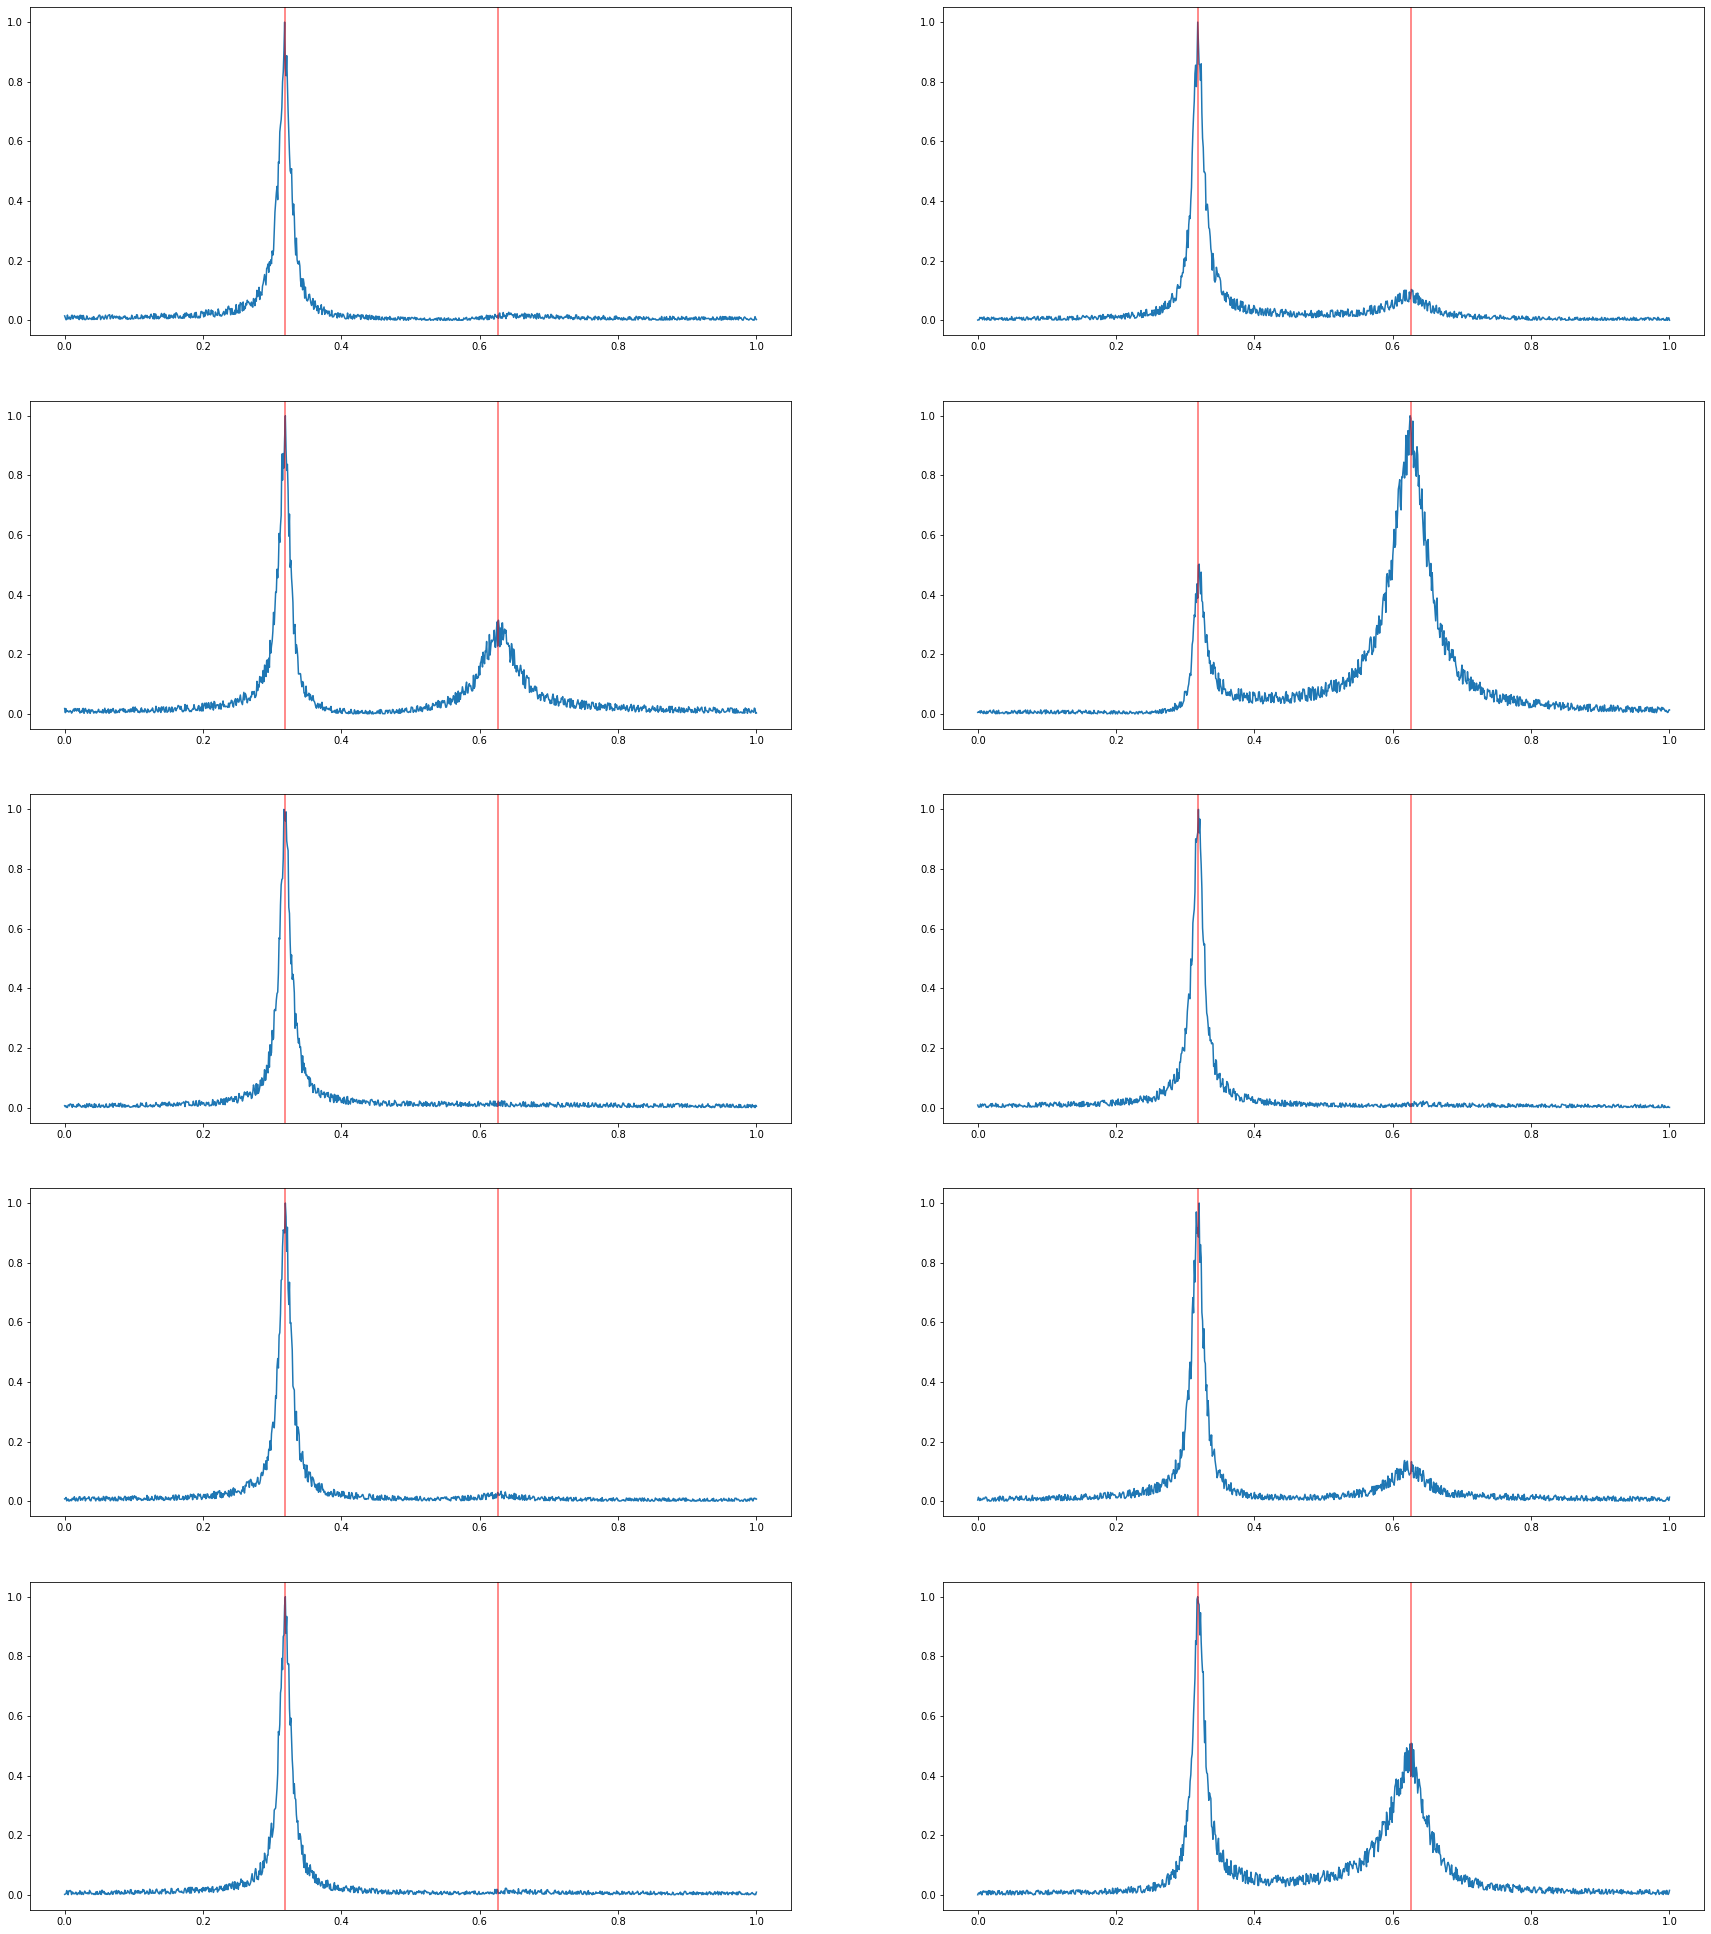

In [320]:
spectrum.plot_channels()

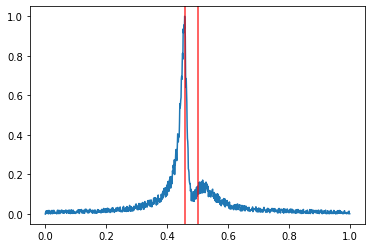

In [210]:
spectrum.plot_channel(1)

In [93]:
spectra_generator.generate_spectrum().__dict__['dm']

{'n_max': 5.0,
 'n_max_s': 5.0,
 'nc': 10.0,
 'k': 1,
 'num_channels': 10.0,
 'scale': 1.0,
 'omega_shift': 10.0,
 'n': 1.0,
 'dm': array([[0.00091605, 0.00067127, 0.00324446, ..., 0.01262859, 0.01187888,
         0.01422611],
        [0.00816584, 0.00324516, 0.00382602, ..., 0.00369119, 0.00184963,
         0.00620309],
        [0.01033584, 0.00062667, 0.00388562, ..., 0.00092414, 0.00432085,
         0.00503823],
        ...,
        [0.00801096, 0.00015366, 0.00343451, ..., 0.00276662, 0.00472421,
         0.0014155 ],
        [0.00798585, 0.00252875, 0.00814231, ..., 0.00681918, 0.01043597,
         0.00174508],
        [0.00922342, 0.00955198, 0.00024947, ..., 0.00143594, 0.00046993,
         0.00771864]]),
 'peak_locations': array(0.69156545)}

In [60]:
spectra_generator.generate_spectra(10)

[{'n': 5.0,
  'num_channels': 10.0,
  'dm': array([[0.0208269 , 0.02253892, 0.0099637 , ..., 0.00040732, 0.00389147,
          0.0002161 ],
         [0.0138599 , 0.01332543, 0.00641046, ..., 0.01726208, 0.00842159,
          0.01226382],
         [0.00267872, 0.00100615, 0.00513228, ..., 0.03412608, 0.03330579,
          0.03655875],
         ...,
         [0.01622746, 0.00373547, 0.00217178, ..., 0.00237711, 0.00412067,
          0.0064957 ],
         [0.00469209, 0.00913277, 0.00675304, ..., 0.00119695, 0.00060038,
          0.0008287 ],
         [0.0192051 , 0.01656793, 0.00655339, ..., 0.00416238, 0.00353598,
          0.0005723 ]]),
  'peak_locations': array([[0.32289244, 0.69732596, 0.56352191, 0.30887174, 0.39503351]])},
 {'n': 3.0,
  'num_channels': 10.0,
  'dm': array([[0.01251392, 0.00456968, 0.01145224, ..., 0.00943986, 0.00319595,
          0.        ],
         [0.00865342, 0.03238539, 0.01786775, ..., 0.00857245, 0.00197015,
          0.01237599],
         [0.01185974, 0.

In [5]:
eng = matlab.engine.start_matlab()
nmax = 5.0
nmaxs = 5.0
nc = 10.0
k = 1.0
scale = 1.0
omega_shift = 10.0
eng.spectra_generator_simple(nmax, nmaxs, nc, k, scale, omega_shift, nargout=0)


In [15]:
eng.spectra_generator_simple(nmax, nmaxs, nc, k, scale, omega_shift, nargout=0)

In [8]:
n, dm = eng.spectra_generator_simple(nmax, nmaxs, nc, k, scale, omega_shift, nargout=2)

In [10]:
import numpy as np

In [11]:
np.array(dm)

array([[4.01878497e-03, 6.42659876e-03, 7.11352637e-04, ...,
        2.58731811e-03, 3.10508438e-03, 4.38540221e-04],
       [9.19951024e-03, 0.00000000e+00, 2.79389783e-03, ...,
        1.71976763e-03, 1.37483928e-04, 2.77965193e-03],
       [1.24015894e-03, 3.92478209e-04, 8.57635772e-03, ...,
        6.28988113e-03, 1.38405547e-02, 5.56861557e-04],
       ...,
       [6.74010054e-03, 2.05644518e-02, 1.98930242e-02, ...,
        1.03017034e-02, 1.03471240e-02, 4.49184424e-03],
       [4.38321919e-03, 1.75136483e-02, 9.75638857e-03, ...,
        1.87080923e-03, 1.50478119e-02, 1.48343909e-02],
       [9.09614018e-05, 2.62787461e-03, 0.00000000e+00, ...,
        8.89431775e-03, 1.40759829e-02, 2.10440499e-02]])

In [1]:
%cd ..

/Users/mateoibarguen/Desktop/DATA-Capstone/spectra_generator


In [7]:
from spectra_generator import SpectraGenerator

In [14]:
spectra_generator = SpectraGenerator()

In [15]:
spectrum = spectra_generator.generate_spectrum()

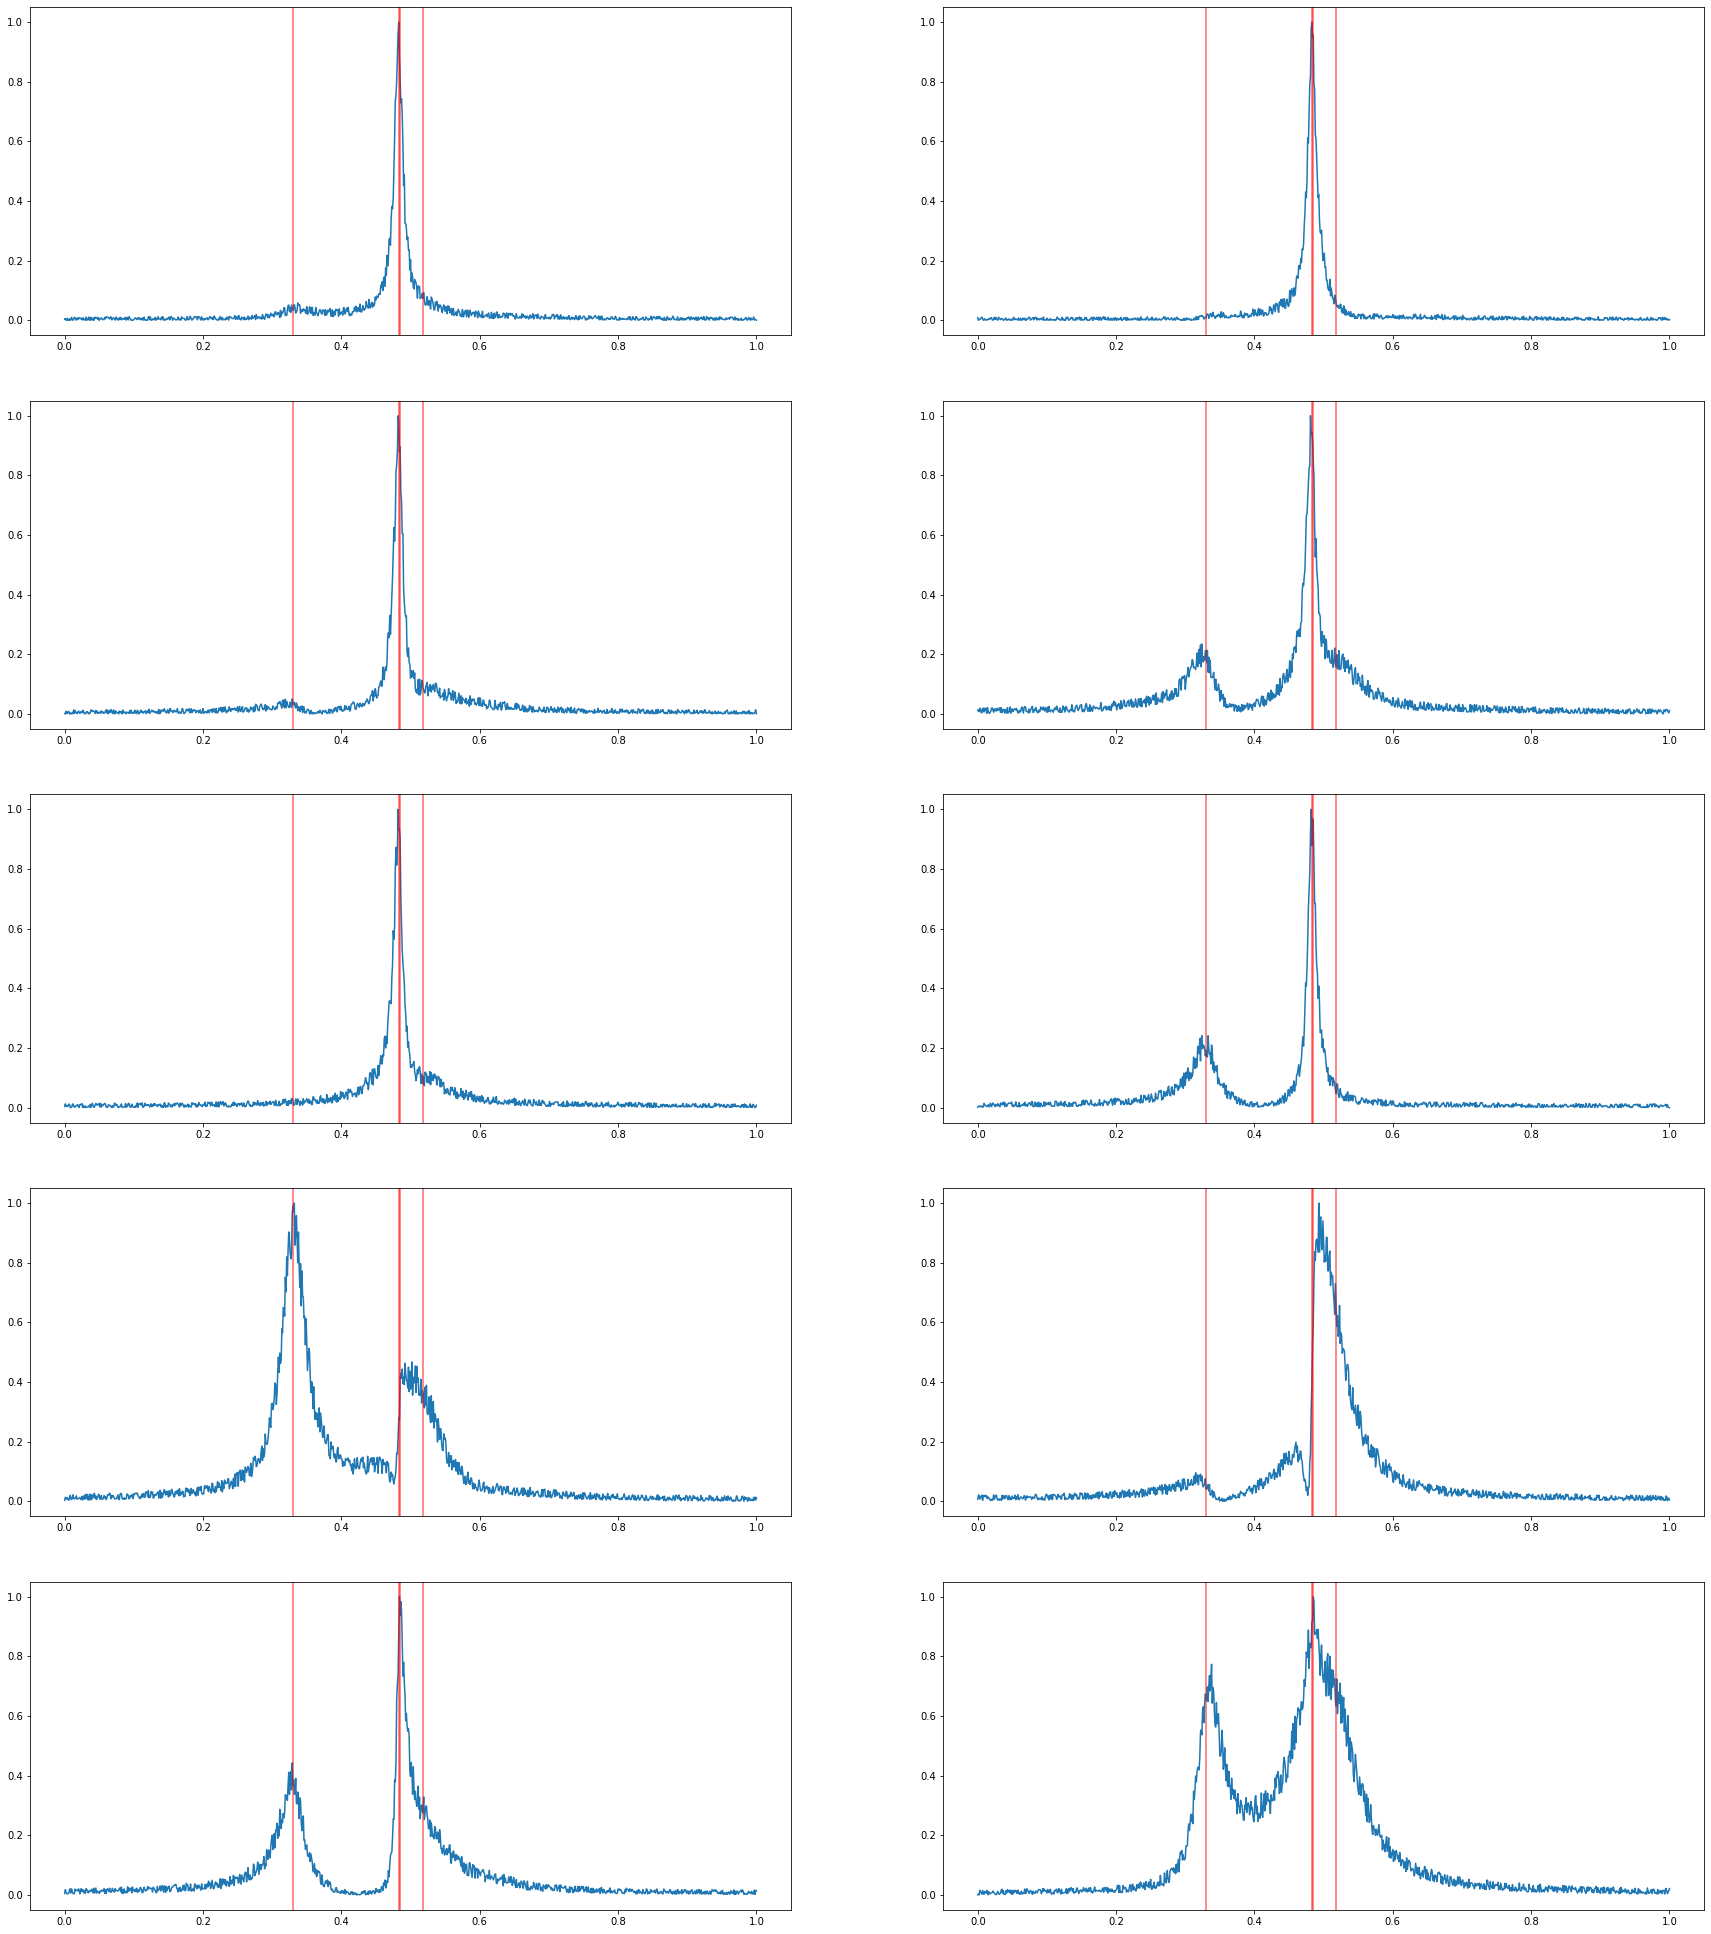

In [16]:
spectrum.plot_channels()